## Importamos librerias necesarias para iniciar EDA

In [164]:
import pandas as pd
import numpy as np
import warnings
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from IPython.display import display
# Text
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


warnings.filterwarnings('ignore')#to filter all the warnings
pd.set_option('float_format', '{:.4f}'.format)# to keep the float values short

[nltk_data] Downloading package punkt to /home/kennydev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kennydev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Carga del dataset preprocesado

In [165]:
df = pd.read_csv('../data/preprocessed/video_cln.csv')
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['category_name']= df['category_name'].astype('category')
df.drop_duplicates()
df.head(3)

video_id trending_date  category_id        publish_time    views  \
0  2kyS6SvSYSE    2017-11-14           22 2017-11-13 17:13:01   748374   
1  1ZAPwfrtAFY    2017-11-14           24 2017-11-13 07:30:00  2418783   
2  5qpjK5DgCt4    2017-11-14           23 2017-11-12 19:05:24  3191434   

    likes  dislikes  comment_count   category_name  \
0   57527      2966          15954  People & Blogs   
1   97185      6146          12703   Entertainment   
2  146033      5339           8181          Comedy   

                                                tags  \
0                                    shantell martin   
1  last week tonight trump presidency last week t...   
2  racist superman rudy mancuso king bach racist ...   

                                         video_title    channel_title  \
0                 we want to talk about our marriage     caseyneistat   
1  the trump presidency last week tonight with jo...  lastweektonight   
2   racist superman rudy mancuso king bach lele pons     rudy mancuso   

                                         description  
0  shantell s channel https www youtube com shant...  
1  one year after the presidential election john ...  
2  watch my previous video n nsubscribe https www...

### Descripcion del dataset preprocesado

* video_id------------------------- ID de cada video `(string)`
* published_time----------------------- Fecha _(año-mes-dia)_ de publicacion del video `(datetime)`
* category_id------------------------ Id de cada categoria por video `(Int)`
* trending_date---------------------- Fecha _(año-mes-dia hora:min:seg)_ en el que el video se hizo viral `(datetime)`
* view_count------------------------- Cantidad de visitas del video `(Int)`
* likes------------------------------ Cantidad del likes del video `(Int)`
* dislikes--------------------------- Cantidad de dislike del video `(Int)`
* comment_count---------------------- Cantidad de comentarios del video `(Int)`
* category_name----------------------- Nombre de la categoria ligada al category_id `(category)`
* description----------------------------- Descripcion por cada video `(string)`
* tags--------------------------------------- Etiquetas sobre el contenido del video `(string)`
* video_title------------------------------ Titulo del video `(string)`
* channel_title-------------------------- Titulo del canal que publico el video `(string)`

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       40949 non-null  object        
 1   trending_date  40949 non-null  datetime64[ns]
 2   category_id    40949 non-null  int64         
 3   publish_time   40949 non-null  datetime64[ns]
 4   views          40949 non-null  int64         
 5   likes          40949 non-null  int64         
 6   dislikes       40949 non-null  int64         
 7   comment_count  40949 non-null  int64         
 8   category_name  40949 non-null  category      
 9   tags           40949 non-null  object        
 10  video_title    40946 non-null  object        
 11  channel_title  40949 non-null  object        
 12  description    40949 non-null  object        
dtypes: category(1), datetime64[ns](2), int64(5), object(5)
memory usage: 3.8+ MB


### 1. ¿Cuáles son las categorías de vídeos que reciben mayores vistas y Likes?

In [167]:
df[df['description'].isna()]

Empty DataFrame
Columns: [video_id, trending_date, category_id, publish_time, views, likes, dislikes, comment_count, category_name, tags, video_title, channel_title, description]
Index: []

In [168]:
# ¿Cuantas categorias existen en nuestro dataset?
len(df['category_name'].unique())

16

In [169]:
df_like_dislikes_cat = df.groupby('category_name')[['likes', 'dislikes', 'views']].sum()
df_like_dislikes_cat.sort_values('views', ascending=False)

likes  dislikes        views
category_name                                           
Music                  1416838584  51179008  40132892190
Entertainment           530516491  42987663  20604388195
Film & Animation        165997476   6075148   7284156721
Comedy                  216346746   7230391   5117426208
People & Blogs          186615999  10187901   4917191726
Sports                   98621211   5133551   4404456673
Howto & Style           162880075   5473899   4078545064
Science & Technology     82532638   4548402   3487756816
Gaming                   69038284   9184466   2141218625
News & Politics          18151033   4180049   1473765704
Education                49257772   1351972   1180629990
Pets & Animals           19370702    527379    764651989
Autos & Vehicles          4245656    243010    520690717
Travel & Events           4836246    340427    343557084
Nonprofits & Activism    14815646   3310381    168941392
Shows                     1082639     24508     51501058

In [170]:
fig = px.line(df_like_dislikes_cat, 
              x=df_like_dislikes_cat.index,
              y='views',
              title='Views per category')
fig.show()

<p style='color: green'>Conclusion</p>

* `Music` es la categoria que mas vistas acumula con mas de 40 billones de visitas
* `Entertainment` es la categoria que se acerca mas a music pero esta cuenta con un total de 20B de visitas acumuladas.
* `Film & Animation` obtiene el 3er lugar de esta ranking con mas de 7B de visitas acumuladas en sus videos

In [171]:
df_like_dislikes_cat.sort_values('likes', ascending=False)

likes  dislikes        views
category_name                                           
Music                  1416838584  51179008  40132892190
Entertainment           530516491  42987663  20604388195
Comedy                  216346746   7230391   5117426208
People & Blogs          186615999  10187901   4917191726
Film & Animation        165997476   6075148   7284156721
Howto & Style           162880075   5473899   4078545064
Sports                   98621211   5133551   4404456673
Science & Technology     82532638   4548402   3487756816
Gaming                   69038284   9184466   2141218625
Education                49257772   1351972   1180629990
Pets & Animals           19370702    527379    764651989
News & Politics          18151033   4180049   1473765704
Nonprofits & Activism    14815646   3310381    168941392
Travel & Events           4836246    340427    343557084
Autos & Vehicles          4245656    243010    520690717
Shows                     1082639     24508     51501058

In [172]:
plt.rcParams["figure.figsize"] = (12,8)
fig = px.line(df_like_dislikes_cat, 
              x=df_like_dislikes_cat.index,
              y='likes',
              title='Likes per category')
fig.show()

<p style='color: green'>Conclusion</p>

* `Music` es la categoria que mas likes acumula con mas de 1.4 billones de likes
* `Entertainment` es la categoria que se acerca mas a music pero esta cuenta con mas de 530 millones de likes acumulados.
* `Comedy` obtiene el 3er lugar de esta ranking con mas de 216 millones de likes acumulados en sus videos

### 2. ¿Es posible encontrar agrupaciones o clasificaciones de videos?

In [173]:
df.sample(3)

video_id trending_date  category_id        publish_time    views  \
29969  whwUlzuLfs4    2018-04-21           10 2018-04-19 13:57:49   636209   
30587  SuzlcQc1iks    2018-04-24           22 2018-04-20 20:51:42  1863842   
18513  d-73-Cr0tQs    2018-02-16           17 2018-02-06 15:53:27   999525   

       likes  dislikes  comment_count   category_name  \
29969   1769       117            489           Music   
30587  42322     13211           9441  People & Blogs   
18513  10096      1786              0          Sports   

                                                    tags  \
29969  bobby bones bobby bones show country country m...   
30587  dobre brothers the dobre brothers lucas and ma...   
18513          olympic games olympics ioc sport champion   

                                             video_title   channel_title  \
29969  carrie underwood stops by bobby bones show for...     bobby bones   
30587                      is it real or is it chocolate  dobre brothers   
18513         live pyeongchang 2018 olympic winter games         olympic   

                                             description  
29969  after a music break and fall that impacted her...  
30587  sponsored by nimses rewarded in nims download ...  
18513  watch live the best of the pyeongchang 2018 wi...

In [174]:
df['trending_month'] = df['trending_date'].dt.month_name()
df['trending_year'] = df['trending_date'].dt.year

In [175]:
categories = df['category_name'].unique()
def plot_per_category(categories, df):
    for category in categories:
        print(category)
        df1 = df[df['category_name'] == category]
        df1 = df1.groupby('trending_month')[['views', 'likes', 'dislikes']].max()
        best_month = df1['views'].idxmax()
        print("Best month for plublish {} video is {}".format(category, best_month))
        fig = px.line(df1, x=df1.index, y='views', title=category)
        fig.show()

In [176]:
plot_per_category(categories, df)

People & Blogs
Best month for plublish People & Blogs video is February


Entertainment
Best month for plublish Entertainment video is December


Comedy
Best month for plublish Comedy video is April


Science & Technology
Best month for plublish Science & Technology video is June


Film & Animation
Best month for plublish Film & Animation video is June


News & Politics
Best month for plublish News & Politics video is June


Sports
Best month for plublish Sports video is January


Music
Best month for plublish Music video is June


Pets & Animals
Best month for plublish Pets & Animals video is December


Education
Best month for plublish Education video is May


Howto & Style
Best month for plublish Howto & Style video is December


Autos & Vehicles
Best month for plublish Autos & Vehicles video is February


Travel & Events
Best month for plublish Travel & Events video is February


Gaming
Best month for plublish Gaming video is May


Nonprofits & Activism
Best month for plublish Nonprofits & Activism video is February


Shows
Best month for plublish Shows video is April


De las graficas anteriores, separadas por categorias, encontramos que:
* `May` es el mes en el que se acumulan la mayor cantidad de vistas para la mayoria de categorias
* Este mes puede ser el ideal cuando se desee publicar un video que acumule la mayor cantidad de vistas

### 3. ¿Cuál es la combinación de características o atributos más importantes que hacen de un video tendencia?

In [177]:
stopwords = set(STOPWORDS)
stopwords.update(['follow', 'twitter', 'social', 'instagram', 'subscribe', 'snapchat', 'youtube', 'videos', 'video'\
                  ,'channel', 'share', 'facebook', 'comment', 'like', 'take', 'go', 'got', 'back',\
                  'much', 'made', 'keep', 'watch','none', 'check', 'will', 'make', 'https',\
                  'nfollow', 'ntwitter', 'nsocial', 'ninstagram', 'nhttp', 'nfacebook',\
                  'n', 'nhttps', 'tumblr', 'e', 'youtube', 'netflix', 'bit', 'ly',\
                  'nwatch', 'goo', 'gl', 'amzn', 'nnbc', 'nbc', 'youtu', 'nlike',\
                  'google', 'plus', 'nclick', 'nbctv', 'c', 's', 'nsubscribe', 'iphone',\
                  'pl7u4lwxq3wfi_7pgx0c-vtiwleu0s4v34', '2018', 'nlearn'])

def generate_wordcloud(text, stop_words):
    wordcloud = WordCloud(stopwords=stop_words,max_font_size=50, max_words=150, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en People & Blogs para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'People & Blogs'

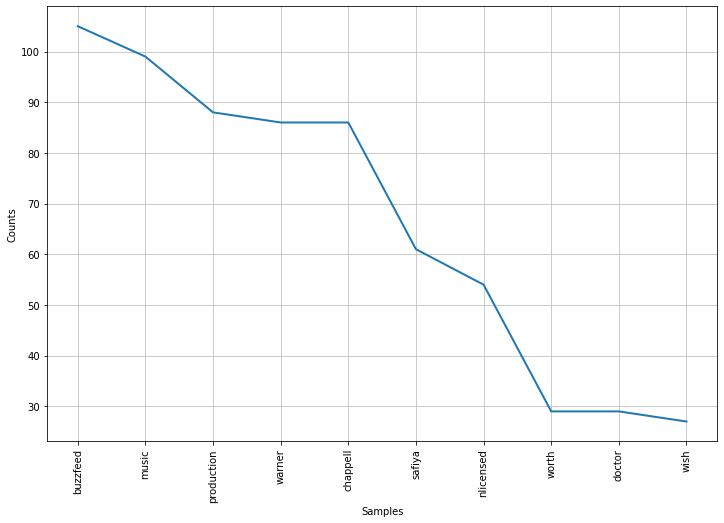

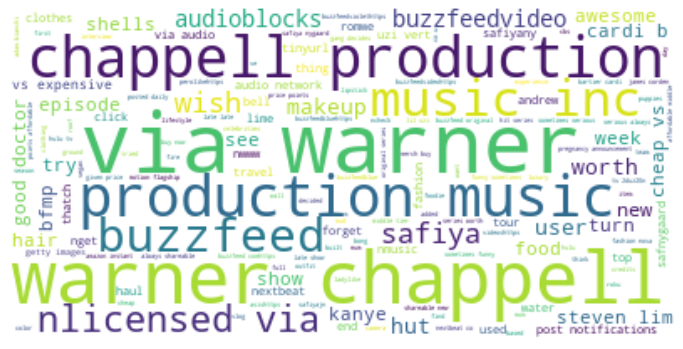


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Entertainment para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Entertainment'

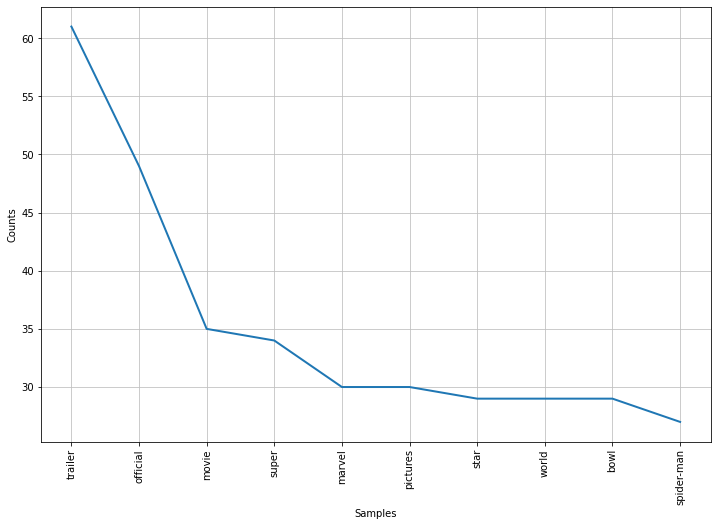

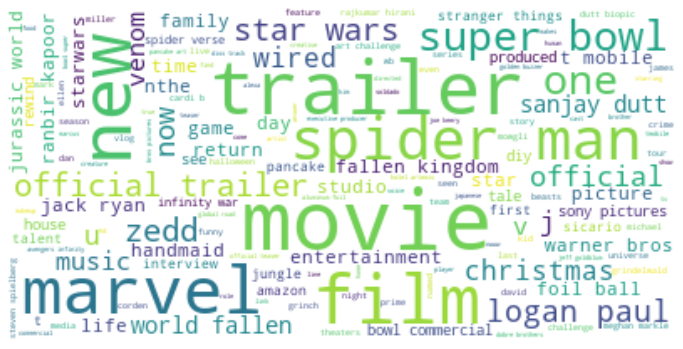


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Comedy para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Comedy'

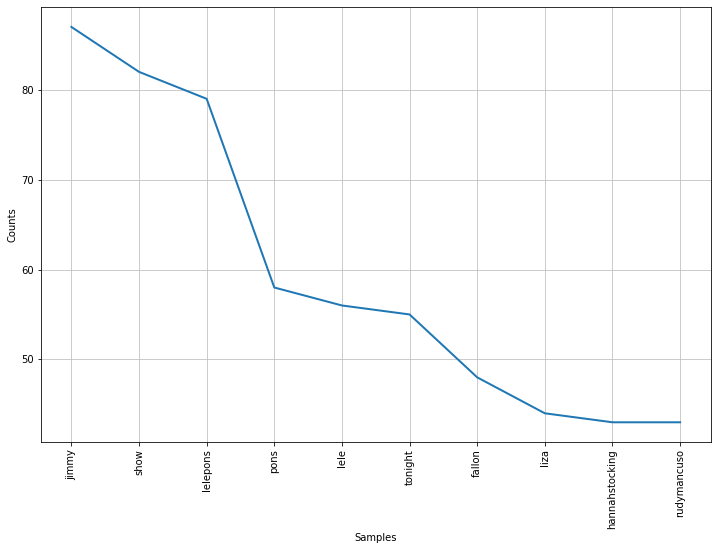

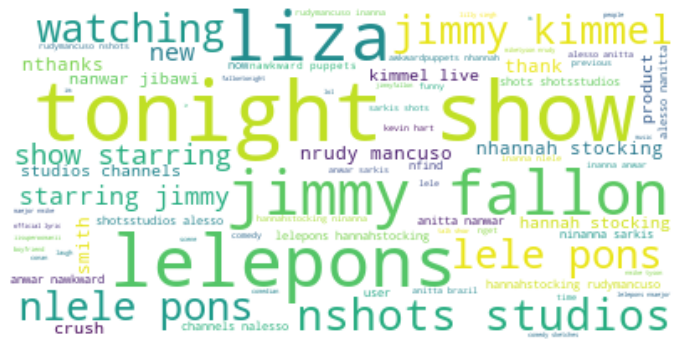


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Science & Technology para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Science & Technology'

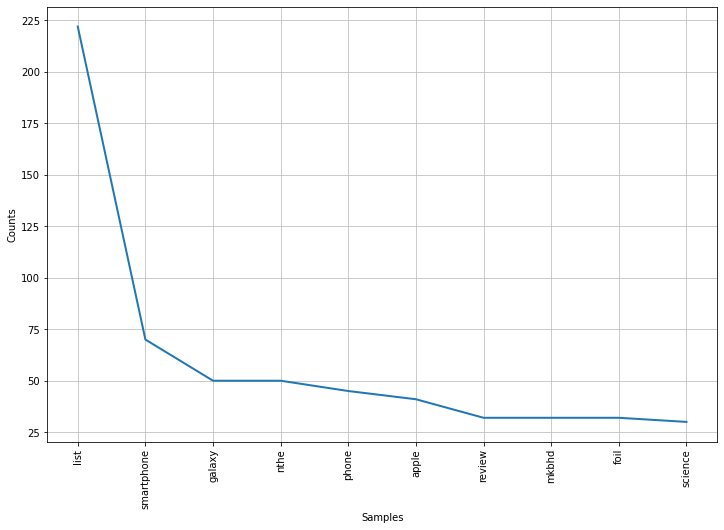

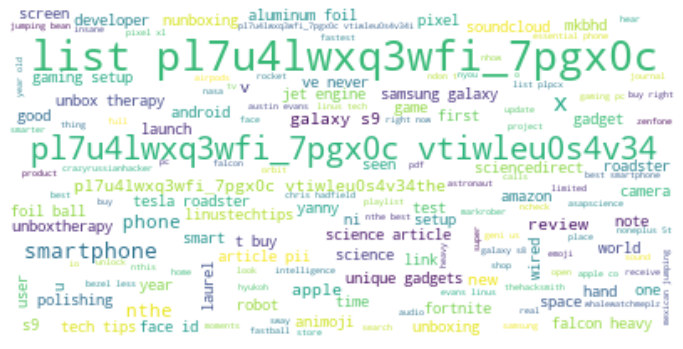


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Film & Animation para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Film & Animation'

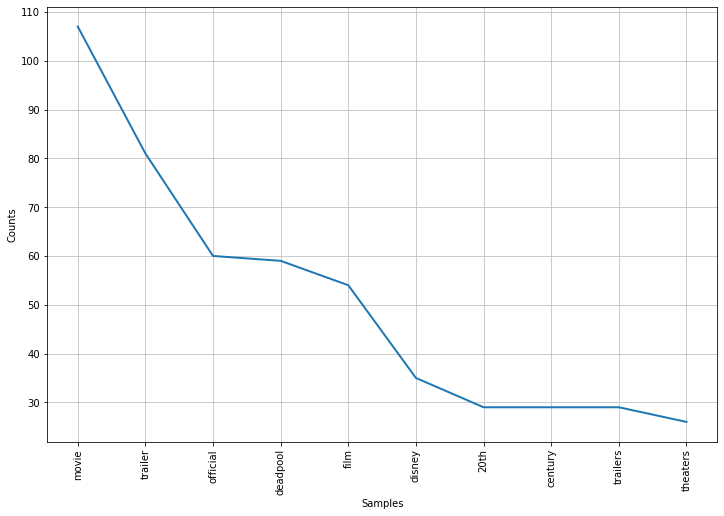

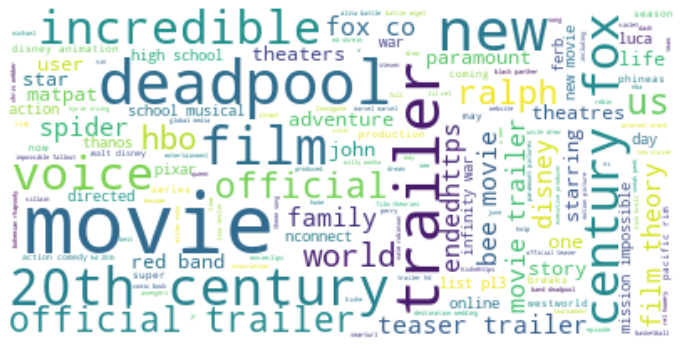


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en News & Politics para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'News & Politics'

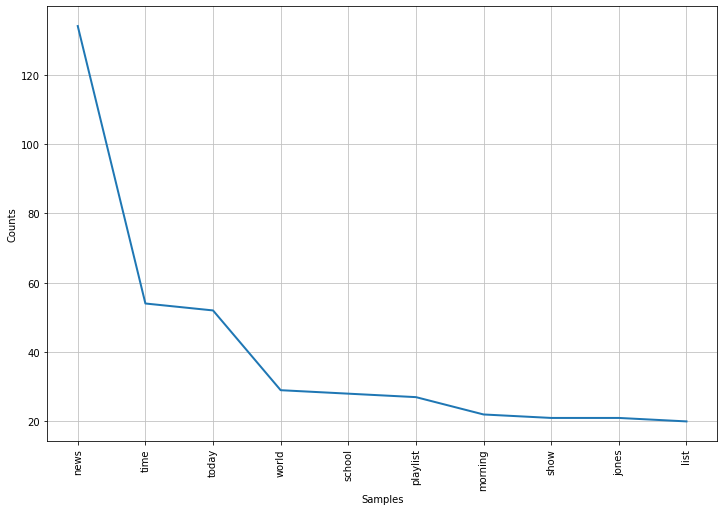

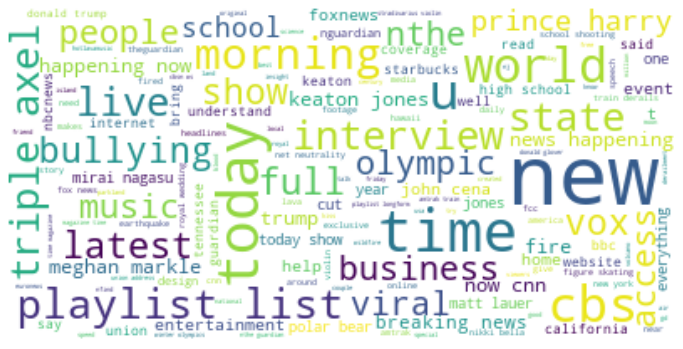


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Sports para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Sports'

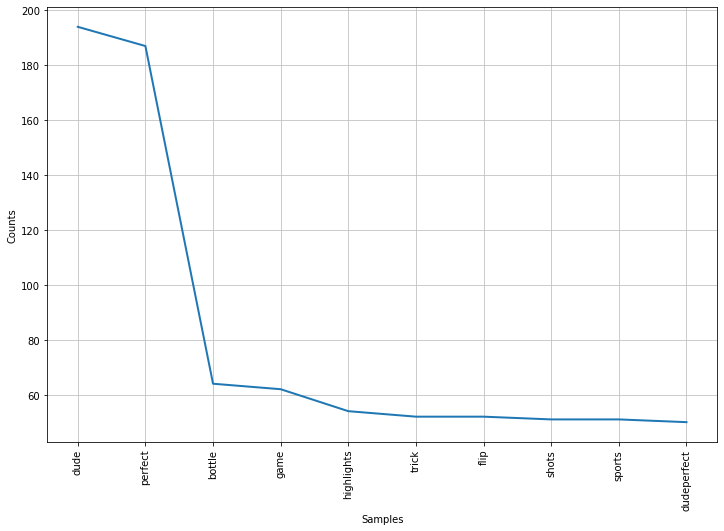

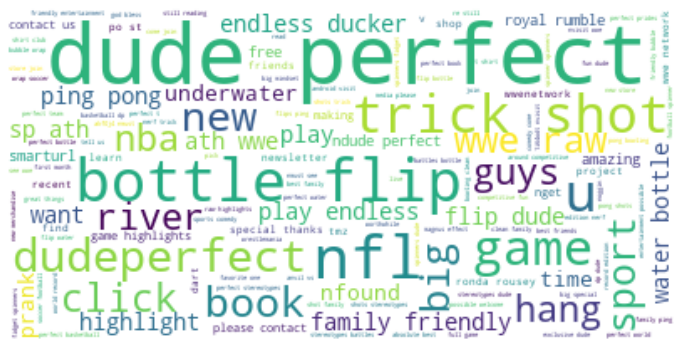


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Music para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Music'

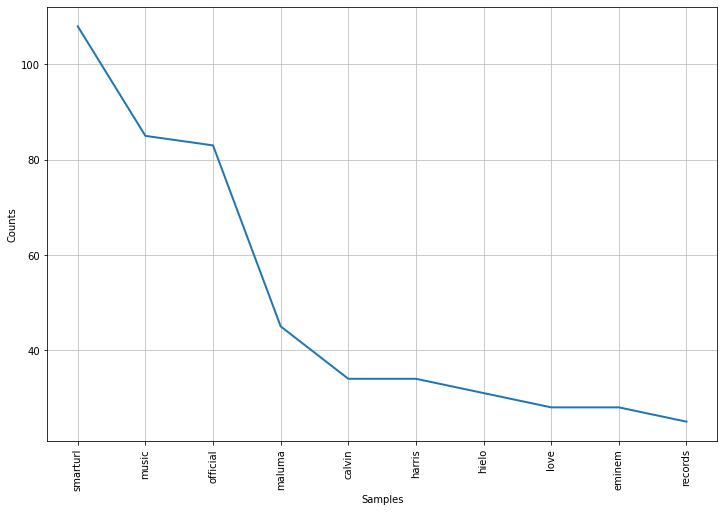

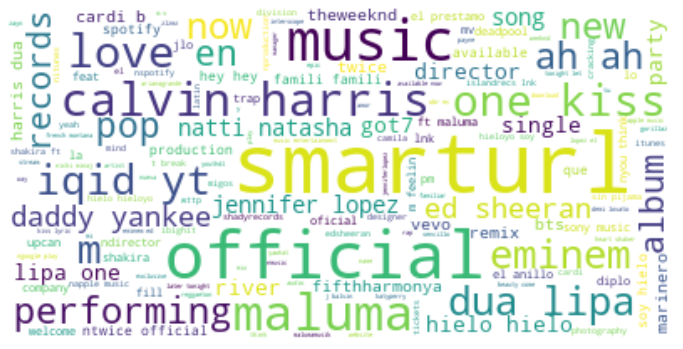


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Pets & Animals para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Pets & Animals'

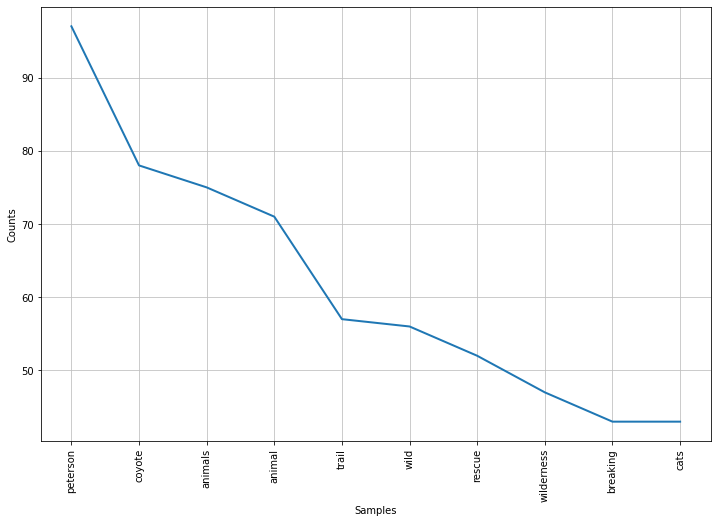

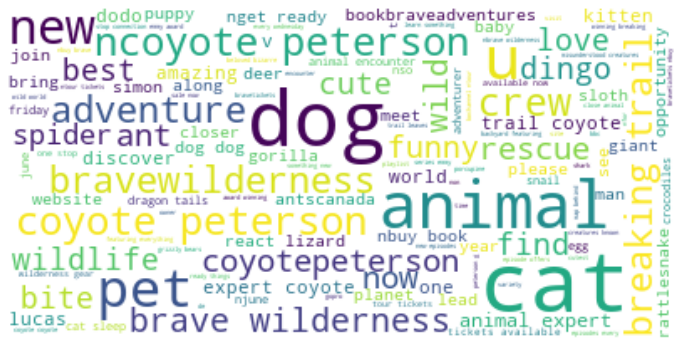


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Education para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Education'

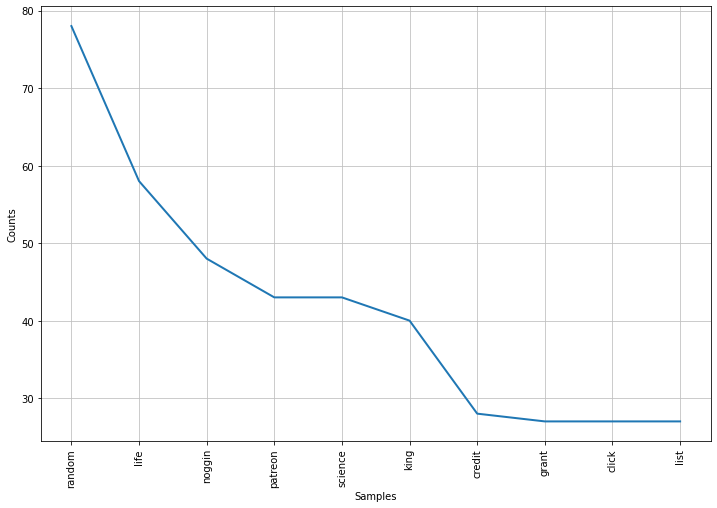

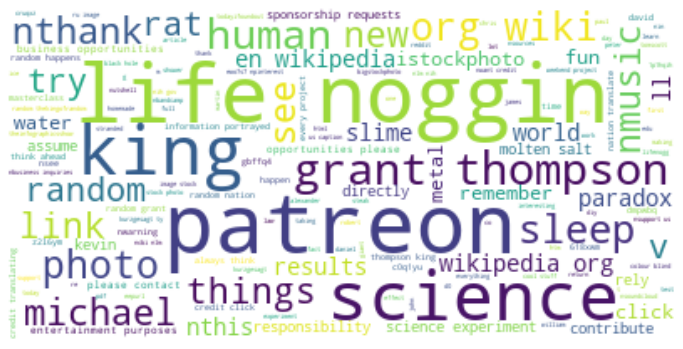


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Howto & Style para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Howto & Style'

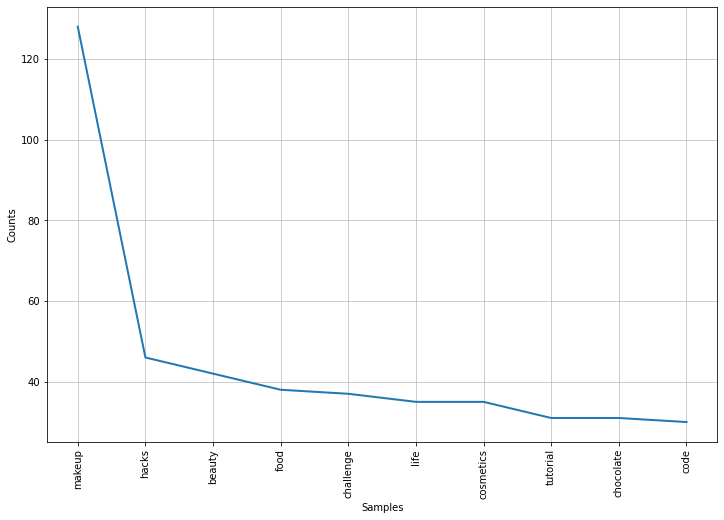

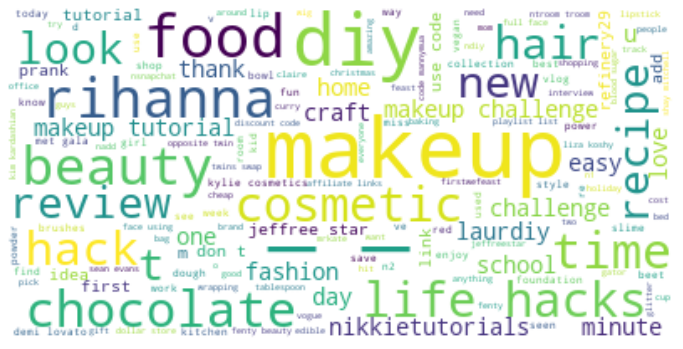


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Autos & Vehicles para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Autos & Vehicles'

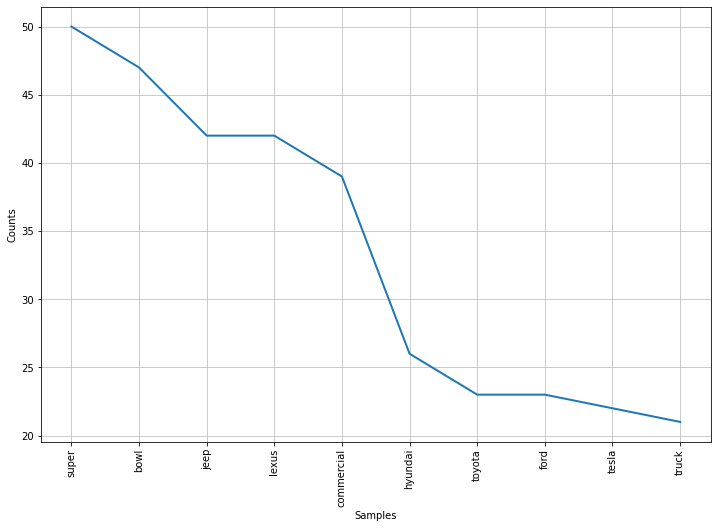

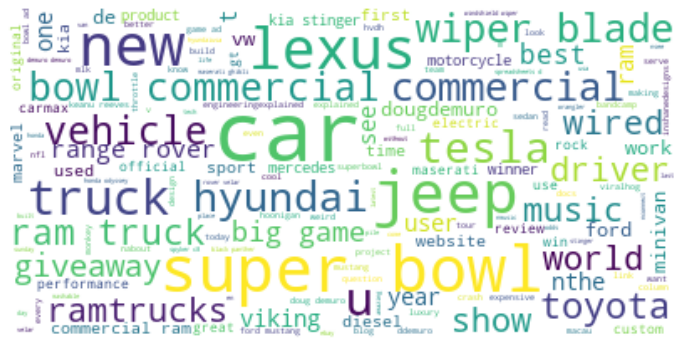


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Travel & Events para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Travel & Events'

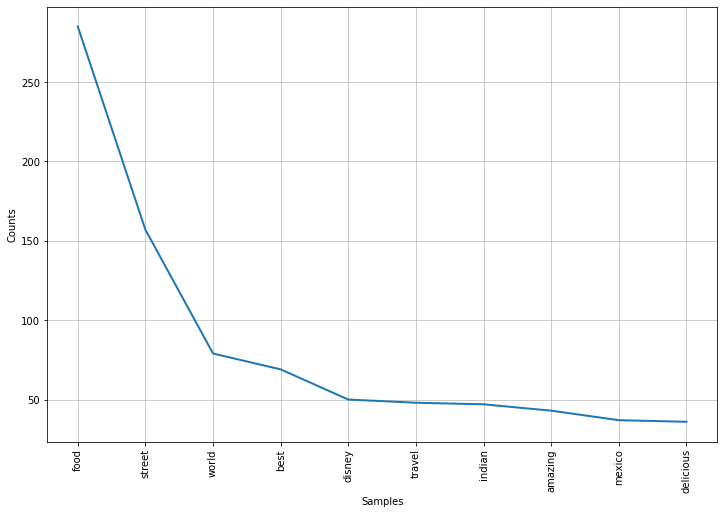

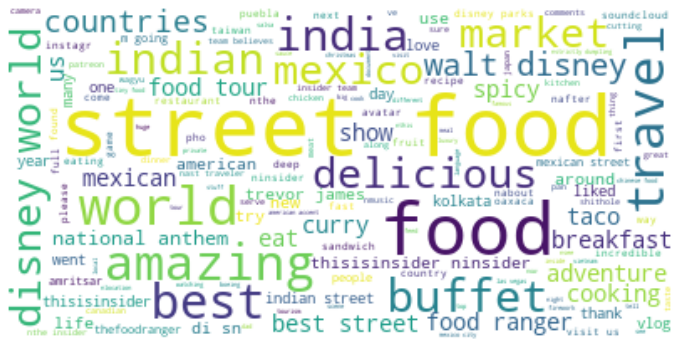


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Gaming para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Gaming'

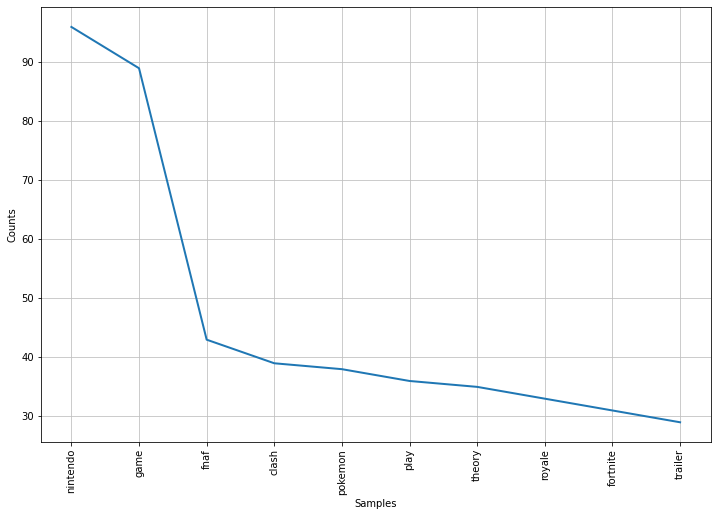

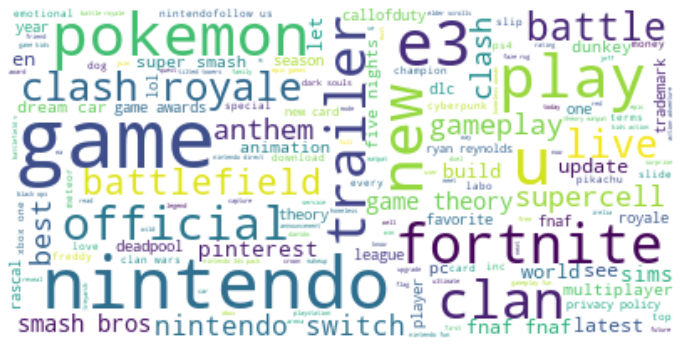


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Nonprofits & Activism para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Nonprofits & Activism'

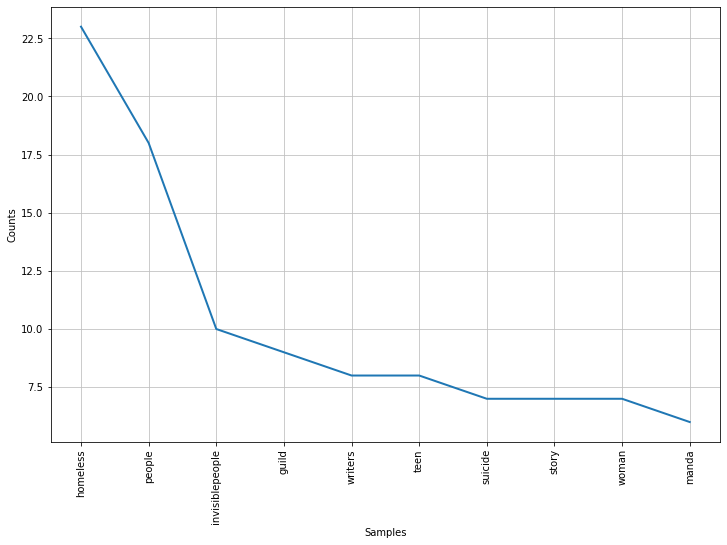

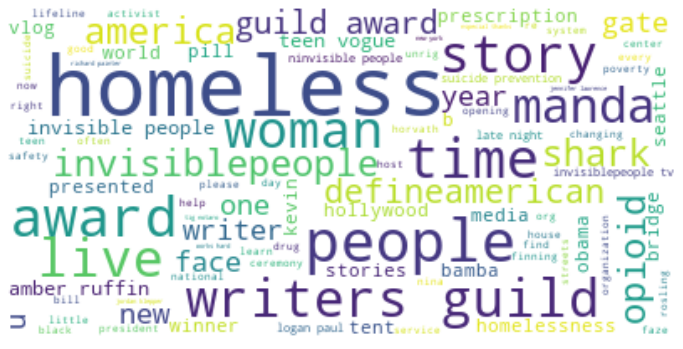


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Shows para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Shows'

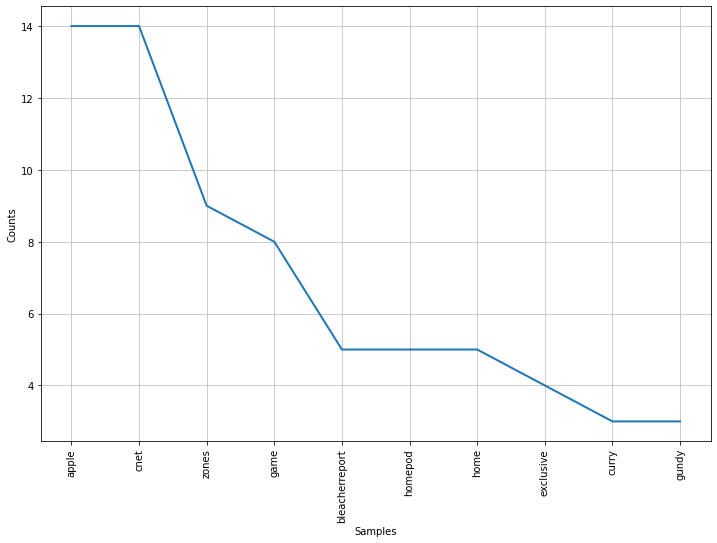

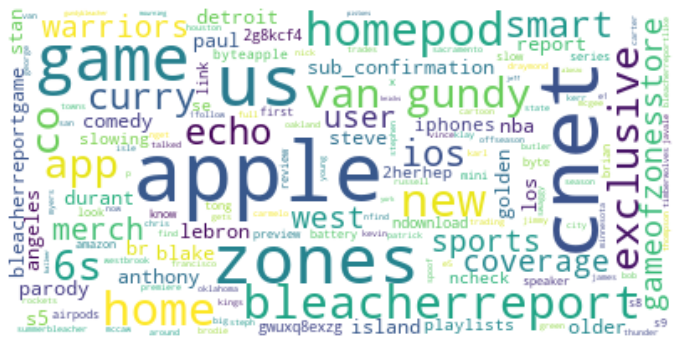

In [178]:
for category in categories:
    df_top_for_category = df[df['category_name'] == category].groupby('video_id', as_index=False)\
        [['description', 'video_title', 'tags', 'views']].max().sort_values(by='views', ascending=False)[:50]
    description = df_top_for_category['description'].values
    video_title = df_top_for_category['video_title'].values
    tags = df_top_for_category['tags'].values

    text = description + video_title + tags
    
    try:
        text = ' '.join(text)
    except Exception:
        text = ' '
    
    tokenlist = nltk.word_tokenize(text, 'english')
    fdist = nltk.FreqDist([word for word in tokenlist if len(word) > 3 if word not in stopwords])
    most_common = fdist.most_common(10)
    print(f"""
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en {category} para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    """)
    display(category)
    fdist.plot(10)
    generate_wordcloud(text, stopwords)

### 4. ¿La temporada o fecha en el que el video es publicado tiene alguna influencia? 

In [179]:
df_trending = pd.DataFrame()
df_trending['video_id'] = df['video_id']
df_trending['published_date'] = df['publish_time']
df_trending['trending_date'] = df['trending_date']
df_trending['views'] = df['views']

In [180]:
total_day_trending = df_trending.groupby('video_id', as_index=False)['trending_date'].count()
total_day_trending.rename({'trending_date':'total_trending_days'}, axis=1, inplace=True)


In [181]:
df_trending = pd.merge(df_trending, total_day_trending, how='left', on='video_id')


In [201]:
df_trending_max = df_trending.groupby('video_id', as_index=False).max()
df_trending_max['publish_year'] = df_trending_max['published_date'].dt.year
df_trending_max['publish_month'] = df_trending_max['published_date'].dt.month_name()
df_trending_max['publish_day'] = df_trending_max['published_date'].dt.day
df_trending_max.groupby('publish_year')['views'].count()

publish_year
2006       1
2008       3
2009       5
2010       6
2011       8
2012       8
2013      13
2014       7
2015      10
2016       9
2017    2152
2018    4129
Name: views, dtype: int64

In [183]:
def plot_per_month(df, year, month=None):
    df_temp = df[df['publish_year'] == year]
    if month:
        df_temp = df_temp[df['publish_month'] == month]
        fig = px.bar(data_frame=df_temp, 
        x='publish_day' ,y='total_trending_days', title='Trending days per Month in {}/{}'.format(month, year))
        display("La mediana de dias en tendencia en {} es {}".format(month, np.median(df_temp['total_trending_days'])))
        fig.show()
        fig2 = px.bar(data_frame=df_temp, 
        x='publish_day', y='views', title='Views per Month in {}/{}'.format(month, year))
        display("La mediana de views en {} es {}".format(month, np.median(df_temp['views'])))
        fig2.show()
        return 'Done!'
    fig = px.bar(df_temp, 'publish_month', 'views', title='Views per Month in {}'.format(year))
    fig.show()
    fig2 = px.bar(df_temp, 'publish_month', 'total_trending_days', title='Total trending days per month in {}'.format(year))
    fig2.show()

In [184]:
plot_per_month(df_trending_max, 2018)

In [185]:
plot_per_month(df_trending_max, 2018, 'April')

'La mediana de dias en tendencia en April es 10.0'

'La mediana de views en April es 1188773.5'

'Done!'

### 5. ¿Es posible predecir cuantos likes o visitas tendrá un video? Si es así, crea un modelo que lo compruebe.

In [195]:
print(df.shape)
df.head(1)

(40949, 15)


video_id trending_date  category_id        publish_time   views  likes  \
0  2kyS6SvSYSE    2017-11-14           22 2017-11-13 17:13:01  748374  57527   

   dislikes  comment_count   category_name             tags  \
0      2966          15954  People & Blogs  shantell martin   

                          video_title channel_title  \
0  we want to talk about our marriage  caseyneistat   

                                         description trending_month  \
0  shantell s channel https www youtube com shant...       November   

   trending_year  
0           2017

Generaremos un nuevo `DataFrame` que contenga información de valor para alimentar nuestro modelo, algunas columnas que contendrá son:
* total_trending_days
* likes
* category_id
* dislikes
* total_views
* published_minute
* published_hour
* published_day
* published_week
* published_month
* published_year

In [196]:
print(df_trending.shape)
df_trending.head(1)

(40949, 5)


video_id      published_date trending_date   views  total_trending_days
0  2kyS6SvSYSE 2017-11-13 17:13:01    2017-11-14  748374                    7

In [202]:
df2 = pd.merge(df, df_trending_max[['video_id', 'total_trending_days']], how='right',
                on='video_id')
df2.shape

(40949, 16)

Comprobamos el resultado del `merge` sobre los dos `DataFrame`

In [207]:
df2[df2['video_id'] == '-0CMnp02rNY']
#df2.head(1)

video_id trending_date  category_id        publish_time   views  likes  \
0  -0CMnp02rNY    2018-06-06           24 2018-06-04 13:00:00  475965   6531   
1  -0CMnp02rNY    2018-06-07           24 2018-06-04 13:00:00  605506   7848   
2  -0CMnp02rNY    2018-06-08           24 2018-06-04 13:00:00  705986   8930   
3  -0CMnp02rNY    2018-06-09           24 2018-06-04 13:00:00  754273   9395   
4  -0CMnp02rNY    2018-06-10           24 2018-06-04 13:00:00  792613   9720   
5  -0CMnp02rNY    2018-06-11           24 2018-06-04 13:00:00  800359   9773   

   dislikes  comment_count  category_name  \
0       172            271  Entertainment   
1       232            354  Entertainment   
2       277            371  Entertainment   
3       303            383  Entertainment   
4       330            413  Entertainment   
5       332            423  Entertainment   

                                                tags  \
0  ellen ellen degeneres the ellen show ellentube...   
1  ellen ellen degeneres the ellen show ellentube...   
2  ellen ellen degeneres the ellen show ellentube...   
3  ellen ellen degeneres the ellen show ellentube...   
4  ellen ellen degeneres the ellen show ellentube...   
5  ellen ellen degeneres the ellen show ellentube...   

                                         video_title channel_title  \
0  mindy kaling s daughter had the perfect reacti...  theellenshow   
1  mindy kaling s daughter had the perfect reacti...  theellenshow   
2  mindy kaling s daughter had the perfect reacti...  theellenshow   
3  mindy kaling s daughter had the perfect reacti...  theellenshow   
4  mindy kaling s daughter had the perfect reacti...  theellenshow   
5  mindy kaling s daughter had the perfect reacti...  theellenshow   

                                         description trending_month  \
0  ocean s 8 star mindy kaling dished on bringing...           June   
1  ocean s 8 star mindy kaling dished on bringing...           June   
2  ocean s 8 star mindy kaling dished on bringing...           June   
3  ocean s 8 star mindy kaling dished on bringing...           June   
4  ocean s 8 star mindy kaling dished on bringing...           June   
5  ocean s 8 star mindy kaling dished on bringing...           June   

   trending_year  total_trending_days  
0           2018                    6  
1           2018                    6  
2           2018                    6  
3           2018                    6  
4           2018                    6  
5           2018                    6

Index(['video_id', 'category_name', 'tags', 'video_title', 'channel_title',
       'description', 'trending_month'],
      dtype='object')

In [210]:
drop_columns_no_numericals = df2.select_dtypes(exclude=['int', 'float', 'datetime']).columns
df2.drop(drop_columns_no_numericals, axis=1, inplace=True)

In [212]:
df2['published_year'] = df2['publish_time'].dt.year
df2['published_month'] = df2['publish_time'].dt.month
df2['published_week'] = df2['publish_time'].dt.week
df2['published_day'] = df2['publish_time'].dt.day
df2['published_hour'] = df2['publish_time'].dt.hour
df2['published_minute'] = df2['publish_time'].dt.minute
df2.head(2)


trending_date  category_id        publish_time   views  likes  dislikes  \
0    2018-06-06           24 2018-06-04 13:00:00  475965   6531       172   
1    2018-06-07           24 2018-06-04 13:00:00  605506   7848       232   

   comment_count  trending_year  total_trending_days  published_year  \
0            271           2018                    6            2018   
1            354           2018                    6            2018   

   published_month  published_week  published_day  published_hour  \
0                6              23              4              13   
1                6              23              4              13   

   published_minute  
0                 0  
1                 0

Eliminamos las columnas tipo `datetime` que ya fueron desempaquetadas

In [213]:
df2.drop(['trending_date', 'publish_time', 'trending_year'], axis=1, inplace=True)
df2.sample(3)

category_id    views  likes  dislikes  comment_count  \
10311           24   346175   5956       225            143   
40292           24   421719   3960       705           1123   
754              1  1673475   6874      7018              0   

       total_trending_days  published_year  published_month  published_week  \
10311                   11            2017               12              51   
40292                   12            2018                4              14   
754                     13            2018                5              18   

       published_day  published_hour  published_minute  
10311             23              11                53  
40292              2               3                 4  
754                6               3                 2

Momento de exportar nuestro nuevo `Dataset` para crear nuestro modelo

In [214]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   category_id          40949 non-null  int64
 1   views                40949 non-null  int64
 2   likes                40949 non-null  int64
 3   dislikes             40949 non-null  int64
 4   comment_count        40949 non-null  int64
 5   total_trending_days  40949 non-null  int64
 6   published_year       40949 non-null  int64
 7   published_month      40949 non-null  int64
 8   published_week       40949 non-null  int64
 9   published_day        40949 non-null  int64
 10  published_hour       40949 non-null  int64
 11  published_minute     40949 non-null  int64
dtypes: int64(12)
memory usage: 4.1 MB


In [215]:
df2.to_csv('../data/model_data/youtube_num.csv')